In [37]:
import numpy as np
import pandas as pd
import requests
from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
url = 'https://rating.chgk.info/tournaments.php?tournament_id=5386&download_data=export_tournament_tour'

In [16]:
table = pd.read_csv(StringIO(requests.get(url).text), sep=';', skiprows=1, 
                    names=['id', 'name', 'town', 'tour'] + list(range(1,16)))
table.head()

,id,name,town,tour,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,58596,Autyata,Москва,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0
1,55517,Das Gemeine,Санкт-Петербург,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0
2,50516,Маникюр для Нагльфара,Санкт-Петербург,1,1,0,0,0,1,0,1,0,0,1,1,0,1,1,1
3,41578,Флуд,Санкт-Петербург,1,1,0,0,1,1,1,1,1,1,0,1,0,0,1,0
4,55606,Искусство ухода,Москва,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0


In [29]:
melted = table.melt(id_vars=table.columns[:4], value_vars=list(range(1,16)), var_name='question')
melted.head()

,id,name,town,tour,question,value
0,58596,Autyata,Москва,1,1,1
1,55517,Das Gemeine,Санкт-Петербург,1,1,1
2,50516,Маникюр для Нагльфара,Санкт-Петербург,1,1,1
3,41578,Флуд,Санкт-Петербург,1,1,1
4,55606,Искусство ухода,Москва,1,1,1


In [30]:
melted.question = melted.question + (melted.tour - 1) * 15
melted.question.max()

90

In [32]:
pivot = melted.pivot(index='name', columns='question', values='value')
pivot.head()

question,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,87,88,89,90
name,,,,,,,,,,,,,,,,,,,,,
812,0,1,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
All-In,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Alma vue,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Autyata,1,1,0,1,1,1,1,1,1,1,...,1,1,1,0,0,1,0,1,0,1
City of tatars,1,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
cum_pivot = np.cumsum(pivot, axis=1).reset_index()
cum_pivot.head()

question,name,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,812,0,1,1,1,2,3,3,3,4,...,35,35,35,35,35,35,35,35,35,35
1,All-In,0,0,0,0,0,1,1,1,1,...,21,21,21,21,21,21,21,21,21,21
2,Alma vue,1,1,1,1,1,1,1,2,2,...,16,16,16,16,16,16,16,16,16,16
3,Autyata,1,2,2,3,4,5,6,7,8,...,60,61,62,62,62,63,63,64,64,65
4,City of tatars,1,2,2,2,2,2,2,3,4,...,31,31,31,31,31,31,31,31,31,31


In [55]:
top = cum_pivot.sort_values(90, ascending=False)
top.head()

question,name,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
3,Autyata,1,2,2,3,4,5,6,7,8,...,60,61,62,62,62,63,63,64,64,65
5,Das Gemeine,1,2,2,3,4,5,6,7,8,...,56,57,57,58,59,60,60,60,60,61
32,Маникюр для Нагльфара,1,1,1,1,2,2,3,3,3,...,52,53,53,54,54,54,54,55,55,56
55,Флуд,1,1,1,2,3,4,5,6,7,...,53,54,54,54,54,54,54,54,54,54
39,Первый трек Бабангиды,0,1,2,3,4,5,5,6,6,...,50,50,50,51,51,51,51,51,51,51


In [50]:
cum_melt = cum_pivot.melt(id_vars=['name'], value_name='cumsum')
cum_melt.head()

,name,question,cumsum
0,812,1,0
1,All-In,1,0
2,Alma vue,1,1
3,Autyata,1,1
4,City of tatars,1,1


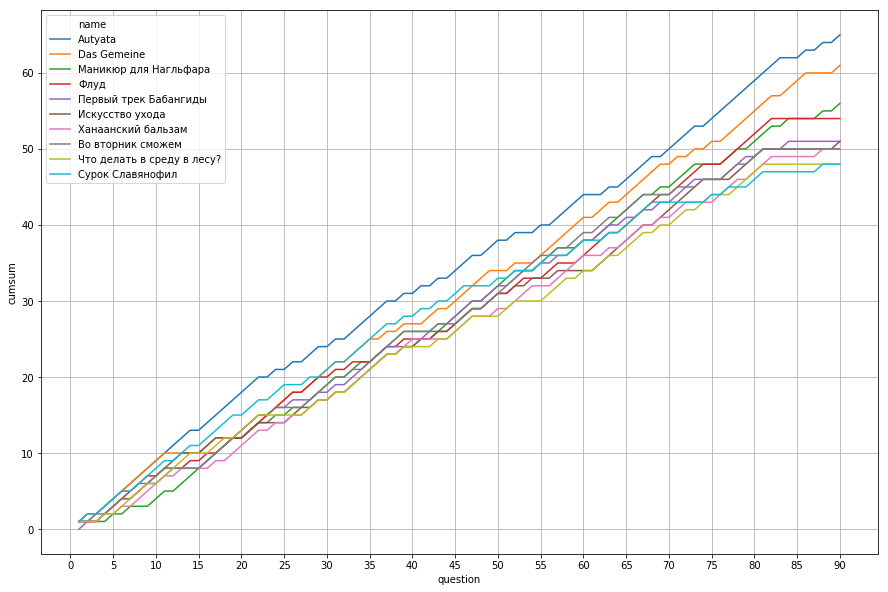

In [62]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=cum_melt.loc[cum_melt.name.isin(top.name[:10])], x='question', y='cumsum', hue='name', hue_order=top.name[:10])
ax.set_xticks(np.arange(0, 91, 5))
ax.grid()
plt.show()

In [ ]:
import plo

In [ ]:
plot_url = py.plot_mpl(fig)